![K Means Clustering Theory](image-13.png)
![Elbow Technique](image-14.png)

In [1]:
# import libraries
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
# load dataset
df = pd.read_csv("../DataSets/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


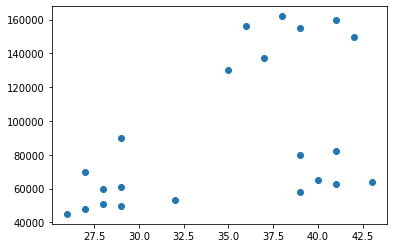

In [3]:
plt.scatter(df["Age"], df["Income($)"])
plt.show()

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_pred = km.fit_predict(df[["Age", "Income($)"]])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [6]:
df["cluster"] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


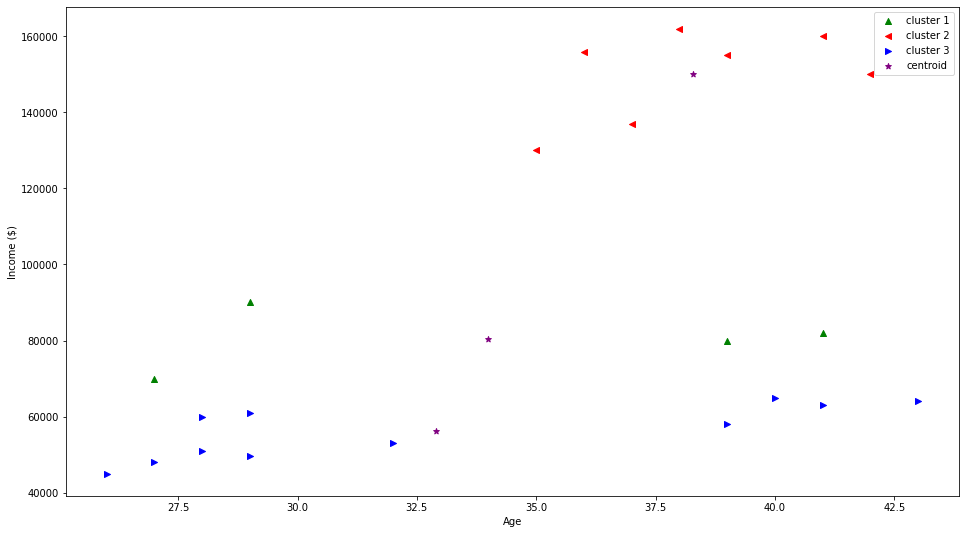

In [7]:
df1 = df[df["cluster"] == 0]
df2 = df[df["cluster"] == 1]
df3 = df[df["cluster"] == 2]

plt.figure(figsize=(16, 9))
plt.scatter(df1["Age"], df1["Income($)"], marker="^", color="green", label="cluster 1")
plt.scatter(df2["Age"], df2["Income($)"], marker="<", color="red", label="cluster 2")
plt.scatter(df3["Age"], df3["Income($)"], marker=">", color="blue", label="cluster 3")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color="purple", marker="*", label="centroid")
plt.xlabel("Age")
plt.ylabel("Income ($)")
plt.legend()
plt.show()

In [11]:
# we can see that two cluster are specified properly. We need preprocessing
scaler = MinMaxScaler()
scaler.fit(df[["Income($)"]])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df["Age"] = scaler.transform(df[["Age"]])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [12]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[["Age", "Income($)"]])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [13]:
df.drop("cluster", axis=1)
df["cluster"] = y_pred
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [15]:
# centroids of the clusters
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

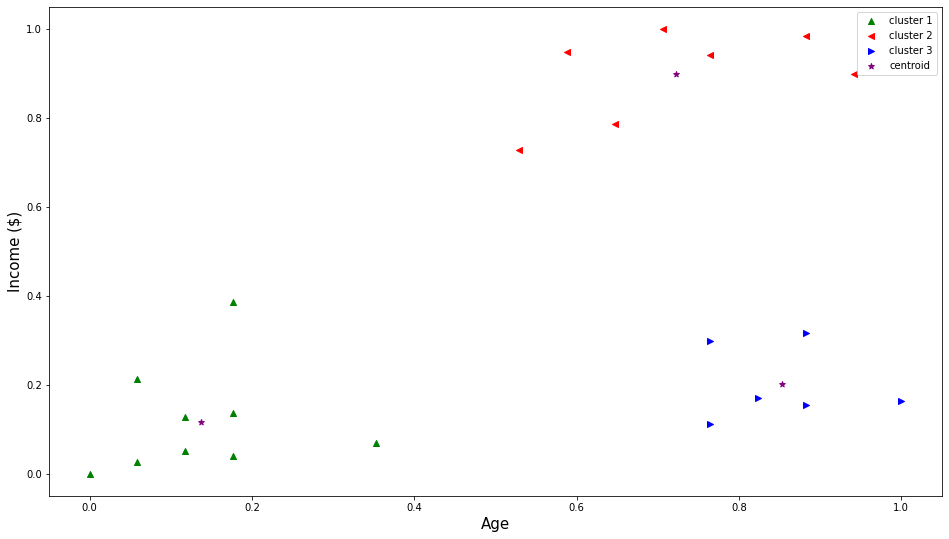

In [16]:
df1 = df[df["cluster"] == 0]
df2 = df[df["cluster"] == 1]
df3 = df[df["cluster"] == 2]

plt.figure(figsize=(16, 9))
plt.scatter(df1["Age"], df1["Income($)"], marker="^", color="green", label="cluster 1")
plt.scatter(df2["Age"], df2["Income($)"], marker="<", color="red", label="cluster 2")
plt.scatter(df3["Age"], df3["Income($)"], marker=">", color="blue", label="cluster 3")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color="purple", marker="*", label="centroid")
plt.xlabel("Age", fontsize=15)
plt.ylabel("Income ($)", fontsize=15)
plt.legend()
plt.show()

In [18]:
# elbow plot method
k_rng = range(1, 10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age", "Income($)"]])
    # this gives the SSE
    sse.append(km.inertia_)

sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.26217927623452125,
 0.2105547899547249,
 0.17381641006430285,
 0.13265419827245162,
 0.10497488680620906]

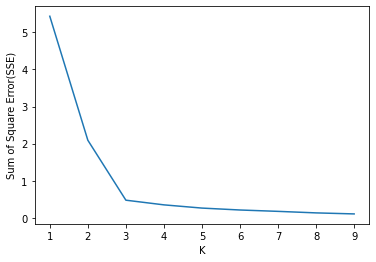

In [19]:
plt.xlabel("K")
plt.ylabel("Sum of Square Error(SSE)")
plt.plot(k_rng, sse)
plt.show()